In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import Thermobar as pt
import pickle

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random
from tqdm.notebook import tqdm, trange

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
Data = pd.read_excel('Plag2Pyx\LowP.xlsx')

In [3]:
New = pt.convert_fo2_to_fe_partition(liq_comps = Data, T_K = Data['T_K'], P_kbar = Data['P_kbar'], 
                              fo2 = 10**Data['logfo2'], model = "Kress1991")

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq']
Comp = New[Elements].copy()
Comp['CO2_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['P_kbar_true'] = Data['P_kbar']

C:\Users\mattg\AppData\Roaming\Python\Python39\site-packages\Thermobar\core.py:4059: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


In [31]:
Presults = {}
P_bar = np.linspace(500, 7500, 36)

Comp['P_kbar_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_max'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['P_kbar_curve'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_curve'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_min'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
Comp['H2O_max'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
for i in range(len(Comp['SiO2_Liq'])):
    try:
        with open('LowPResults/Sample_' + str(i) + '.obj', 'rb') as f:
            res = pickle.load(f)
        
        res['P'] = res['H2O_melt'].copy()
        for k in range(len(res['P'][:,0,0])):
            res['P'][k,0,:] = P_bar
        
        Presults[str(i)] = res
        
        if res['Minimum']['Res'] < 20.0:
            try:
                Comp['P_kbar_calc'].loc[i] = np.nanmean(res['Minimum']['P'])/1000
                Comp['H2O_calc'].loc[i] = np.nanmean(res['Minimum']['H2O'])
                Comp['P_kbar_curve'].loc[i] = res['CurveMin']['Res_abc']['P_min']/1000
                Comp['H2O_curve'].loc[i] = res['CurveMin']['Res_abc']['H2O_min']
            except:
                Comp['P_kbar_calc'].loc[i] = res['Minimum']['P']/1000
                Comp['H2O_calc'].loc[i] = res['Minimum']['H2O']
                Comp['P_kbar_curve'].loc[i] = res['CurveMin']['Res_abc']['P_min']/1000
                Comp['H2O_curve'].loc[i] = res['CurveMin']['Res_abc']['H2O_min']
                
        if len(res['range'][np.where(res['range'] == 1.0)]) > 0:
            Comp['P_kbar_min'].loc[i] = np.nanmin(res['P'][np.where(res['range'] == 1.0)])/1000
            Comp['P_kbar_max'].loc[i] = np.nanmax(res['P'][np.where(res['range'] == 1.0)])/1000
            Comp['H2O_min'].loc[i] = np.nanmin(res['H2O_melt'][np.where(res['range'] == 1.0)])
            Comp['H2O_max'].loc[i] = np.nanmax(res['H2O_melt'][np.where(res['range'] == 1.0)])
            
        P = float(round(Comp['P_kbar_true'].loc[i])*1000)
        H2O_max = np.nanmax(res['H2O_melt'][res['P'] <= P])
        
        if H2O_max < Comp['H2O_Liq'].loc[i]:
            Comp['H2O_Liq'].loc[i] = H2O_max
            
        
    except:
        pass

In [32]:
res['P']

array([[[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500., 3700., 3900.,
         4100., 4300., 4500., 4700., 4900., 5100., 5300., 5500., 5700.,
         5900., 6100., 6300., 6500., 6700., 6900., 7100., 7300., 7500.]],

       [[ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
         2300., 2500., 2700., 2900., 3100., 3300., 3500

Text(0, 0.5, 'Calculated H$_{2}$O (wt%)')

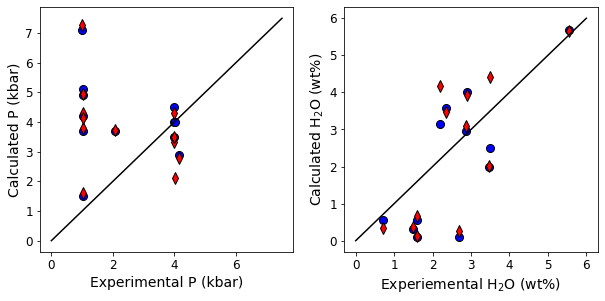

In [33]:
f, a = plt.subplots(1,2, figsize = (10,4.5))
#a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_max'], '^k', markerfacecolor = 'red', markersize = 10, alpha = 0.6)
#a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_min'], 'vk', markerfacecolor = 'yellow', markersize = 10, alpha = 0.6)
a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_calc'], 'ok', markerfacecolor = 'blue', markersize = 8)
a[0].plot(Comp['P_kbar_true'], Comp['P_kbar_curve'], 'dk', markerfacecolor = 'red', markersize = 8)
a[0].plot([0,7.5],[0,7.5], '-k')
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')


#a[1].plot(Comp['H2O_Liq'], Comp['H2O_max'], '^k', markerfacecolor = 'red', markersize = 10, alpha = 0.6)
#a[1].plot(Comp['H2O_Liq'], Comp['H2O_min'], 'vk', markerfacecolor = 'yellow', markersize = 10, alpha = 0.6)
a[1].plot(Comp['H2O_Liq'], Comp['H2O_calc'], 'ok', markerfacecolor = 'blue', markersize = 8)
a[1].plot(Comp['H2O_Liq'], Comp['H2O_curve'], 'dk', markerfacecolor = 'red', markersize = 8)
a[1].plot([0,6],[0,6], '-k')
a[1].set_xlabel('Experiemental H$_{2}$O (wt%)')
a[1].set_ylabel('Calculated H$_{2}$O (wt%)')

In [34]:
Comp['H2O_offset'] = Comp['H2O_Liq'] - Comp['H2O_calc']
Comp['P_kbar_offset'] = Comp['P_kbar_true'] - Comp['P_kbar_calc']

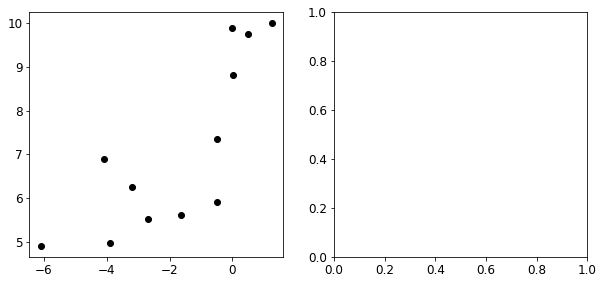

In [42]:
f, a = plt.subplots(1,2, figsize = (10,4.5))
a[0].plot(Comp['P_kbar_offset'], Comp['_Liq'], 'ok')

In [ ]:
#Comp.to_excel('P2P_results.xlsx')
H2O_Liq = np.linspace(0.1, 6, 14)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = Comp.loc[1].to_dict(), 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 12,
                                   H2O_Liq = H2O_Liq,
                                   find_range = True,
                                  find_min = True)